# **Modelo de Aprendizaje Automático No Supervisado: Clusterización**

Número de centros: 10


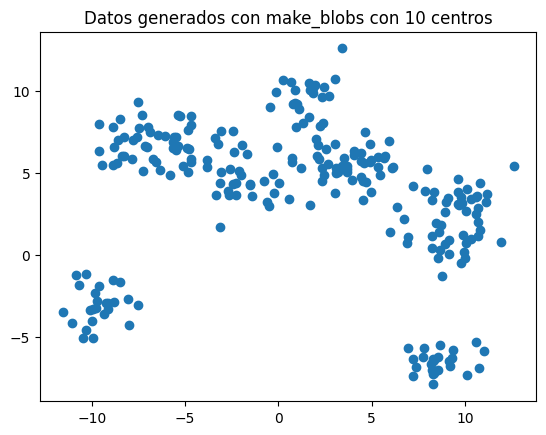

Tamaño del conjunto de entrenamiento: (175, 2)
Tamaño del conjunto de prueba: (37, 2)
Tamaño del conjunto de validación: (38, 2)
Mejor número de clústeres según Silhouette Score: 7
Mejor número de clústeres según Inercia: 7


ValueError: 'c' argument has 175 elements, which is inconsistent with 'x' and 'y' with size 1.

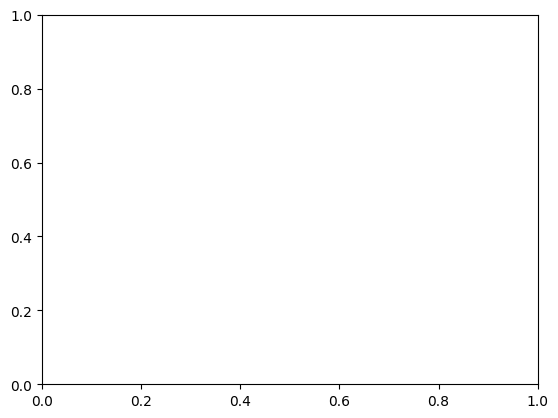

In [ ]:
#---------------------------------------------------------------------------------
# Modelo de Aprendizaje Automático No Supervisado: Clusterización
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
# Paso 1: Importación de Bibliotecas
#---------------------------------------------------------------------------------
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

#---------------------------------------------------------------------------------
# Paso 2: Generación del Conjunto de Datos
#---------------------------------------------------------------------------------
# Generamos un conjunto de datos sintético con blobs gaussianos.
#
# make_blobs: genera blobs gaussianos isotrópicos para agrupar en clústeres
#  n_samples      entero o array. Si entero, es el número total de puntos (100)
#  n_features     número de características de cada muestra (por defecto es 2)
#  centers        número de centros para generar
#  cluster_std    desviación estándar de los clústeres (1.0)
#-----------------------------------------------------------------------------
random.seed(42)  # Fijar la semilla para reproducibilidad
centros = 10
print( "Número de centros:", centros )
samples = 250
X, y = make_blobs( n_samples = samples, centers = centros)

plt.scatter( X[:, 0], X[:, 1] )
plt.title( f"Datos generados con make_blobs con {centros} centros" )
plt.show()

#---------------------------------------------------------------------------------
# División del Conjunto de Datos en Entrenamiento (70%), Prueba (15%) y Validación (15%)
#---------------------------------------------------------------------------------
X_train, X_temp = train_test_split( X,      test_size = 0.3, random_state = 42 )
X_test,  X_val  = train_test_split( X_temp, test_size = 0.5, random_state = 42 )

print( f"Tamaño del conjunto de entrenamiento: {X_train.shape}" )
print( f"Tamaño del conjunto de prueba: {X_test.shape}" )
print( f"Tamaño del conjunto de validación: {X_val.shape}" )

#---------------------------------------------------------------------------------
# Paso 3: Escalado de los Datos
#
# Normalizamos los datos para mejorar el rendimiento del algoritmo.
#---------------------------------------------------------------------------------
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform( X_train )
#X_test_scaled  = scaler.transform(     X_test  )
#X_val_scaled   = scaler.transform(     X_val   )

X_train_scaled = X_train
X_test_scaled  = X_test
X_val_scaled   = X_val

#---------------------------------------------------------------------------------
# Paso 4: Selección del Mejor Número de Clústeres
#-----------------------------------------------------------------------------
#
#   Los parámetros del algoritmo K-means más importantes son:
#
#       n_clusters    número de agrupaciones (y centroides) a generar. (int, default = 8)
#       init          método de inicialización (k-means, random)
#       n_init        veces que se ejecuta el algoritmo con cada centroide (auto, int)
#       max_iter      máximo de veces que se ejectua el algoritmo por ejecución (int, default = 300 )
#       tol           tolerancia en la convergencia entre los centroides (float, defaulr = 1e-4)
#       verbose       ejecución comentada (int, default = 0)
#       random_state  generación de números aleatorios (con init es determinística). (int, instancia de RandomState, None)
#       copy_x        si los centroides se recalculan antes de empezar el funcionamiento. (bool, default = True)
#       algorithm     algoritmo k-means que se utilizará (lloyd, elkan, auto, full). Por defecto es lloyd.
#-----------------------------------------------------------------------------
#
#   Las métricas más importantes para evaluar la calidad de la Clusterización son:
#       * Silhouette Score              mide la separación de cada punto respecto a los demás clústeres
#       * Inercia                       mide la suma del cuadrado de las distancias de cada punto con su centroide
#       * Índice de Davies-Bouldin      mide la relación entre la dispersión dentro dun clúster y la separación entre el centoride y los clústeres
#       * Índice de Calinski-Harabasz   mide la relación entre la varianza intra-clúster e inter-clúster
#       * Coeficiente de Dunn           mide la relación entre la distancia mínima entre clústeres y la distancia máxima dentro de un clúster
#---------------------------------------------------------------------------------

# Selección del Mejor Número de Clústeres
silhouette_scores = {}
Inercias = {}
for k in range( 2, 20 ):
    kmeans = KMeans( n_clusters = k, max_iter = 10000, tol = 1e-7, verbose = 0, n_init = 20, random_state = 42 )
    kmeans.fit( X_train_scaled )
    labels = kmeans.labels_
    silhouette_scores[ k ] = silhouette_score( X_train_scaled, labels )
    Inercias[ k ] = kmeans.inertia_

best_k = max( silhouette_scores, key = silhouette_scores.get )
print( f"Mejor número de clústeres según Silhouette Score: {best_k}" )
print( f"Mejor número de clústeres según Inercia: {best_k}" )

#---------------------------------------------------------------------------------
# Paso 5: Aplicación del Algoritmo K-Means con el Mejor k
#---------------------------------------------------------------------------------
kmeans = KMeans( n_clusters = best_k, max_iter = 10000, tol = 1e-7, verbose = 0, n_init = 20, random_state = 42 )
kmeans.fit( X_train_scaled )
y_kmeans = kmeans.predict( X_train_scaled )

#---------------------------------------------------------------------------------
# Paso 6: Visualización de los Clústeres
#---------------------------------------------------------------------------------
plt.scatter( X_train_scaled[:, 0], X_train_scaled[:, 1], c = y_kmeans, cmap = 'viridis', alpha = 0.6 )
plt.title( f"Clusterización con K-Means y mejor k = {best_k}" )
plt.show()

#---------------------------------------------------------------------------------
# Paso 7: Evaluación del Modelo en Conjunto de Validación
#---------------------------------------------------------------------------------
y_val_kmeans = kmeans.predict(X_val_scaled)
val_score = silhouette_score(X_val_scaled, y_val_kmeans)
print(f"Evaluación en conjunto de validación - Silhouette Score: {val_score:.4f}")
